# Video Game Sales Market Analysis: Identifying Success Factors

📘 Project Overview
Context / Client:
Strimchik is an online video game retailer with a global customer base, offering games across various platforms such as Xbox, PlayStation, and PC.

Goal:
To identify key patterns and factors that contribute to a video game's commercial success. The analysis is based on historical data including sales figures, user and critic ratings, genres, and platform types. The insights gained will help inform product selection and guide marketing strategies for future campaigns.

Business Task:
Utilize data available up to the end of 2016 to simulate planning a promotional campaign for 2017. The primary objective is to practice data-driven decision-making in a commercial setting, regardless of the specific target year.

Additional Information:
The dataset includes age ratings assigned by the Entertainment Software Rating Board (ESRB), which evaluates video game content and provides categories such as “Mature,” “Everyone,” or “Teen.”

Name — the name of the game

Platform — the platform on which the game was released

Year_of_Release — the year the game was released

Genre — the genre of the game

NA_sales — sales in North America (in millions of copies)

EU_sales — sales in Europe (in millions of copies)

JP_sales — sales in Japan (in millions of copies)

Other_sales — sales in other regions (in millions of copies)

Critic_Score — critic rating (out of 100)

User_Score — user rating (out of 10)

Rating — ESRB rating (Entertainment Software Rating Board), which assigns an age category based on game content.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
file_path = "games.csv"

if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    raise FileNotFoundError(f"File not found: {file_path}")

#### Data Validation: Checking for Errors, Duplicates, and Missing Values

In [3]:
def general_info(data):
    return display(data.head(10)),display(data.info()), display(data.columns), display(data.isna().mean())

In [4]:
general_info(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

(None, None, None, None)

<div style="border:solid blue 2px; padding: 20px"> 
Column names should be converted to lowercase. Data types for the release year and user score columns need to be updated. Missing values and duplicates should also be checked. Missing values that account for less than 1% of the data will be removed.

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data = data.dropna(subset= ['name','year_of_release','genre'])

In [7]:
data[['name','platform','year_of_release','genre']].nunique()

name               11426
platform              31
year_of_release       37
genre                 12
dtype: int64

In [8]:
data['platform'].value_counts()

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [9]:
display(data.query('platform == "PCFX"').sort_values(by = 'name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14634,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996.0,Role-Playing,0.0,0.0,0.03,0.0,NaN,NaN,NaN


In [10]:
display(data.query('platform == "GG"').sort_values(by = 'name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13571,Sonic the Hedgehog 2 (8-bit),GG,1992.0,Platform,0.0,0.0,0.04,0.0,NaN,NaN,NaN


In [11]:
display(data.query('platform == "TG16"').sort_values(by = 'name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9223,Doukyuusei,TG16,1995.0,Adventure,0.0,0.0,0.14,0.0,NaN,NaN,NaN
15633,Ginga Fukei Densetsu: Sapphire,TG16,1995.0,Shooter,0.0,0.0,0.02,0.0,NaN,NaN,NaN


In [12]:
display(data.query('platform == "SCD"').sort_values(by = 'name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11781,Formula One World Championship: Beyond the Limit,SCD,1994.0,Racing,0.0,0.00,0.07,0.00,NaN,NaN,NaN
13489,Game no Kanzume Vol 1,SCD,1994.0,Misc,0.0,0.00,0.04,0.00,NaN,NaN,NaN
13010,Game no Kanzume Vol 2,SCD,1994.0,Misc,0.0,0.00,0.05,0.00,NaN,NaN,NaN
12612,Record of Lodoss War: Eiyuu Sensou,SCD,1994.0,Role-Playing,0.0,0.00,0.06,0.00,NaN,NaN,NaN
9008,Shining Force CD,SCD,1994.0,Strategy,0.0,0.00,0.14,0.00,NaN,NaN,NaN
1263,Sonic CD,SCD,1993.0,Platform,1.0,0.36,0.09,0.05,NaN,NaN,NaN


In [13]:
display(data.query('platform == "WS"').sort_values(by = 'name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8039,Chocobo no Fushigi Dungeon for WonderSwan,WS,1999.0,Role-Playing,0.0,0.0,0.18,0.0,NaN,NaN,NaN
6110,Digimon Adventure: Anode Tamer,WS,1999.0,Role-Playing,0.0,0.0,0.28,0.0,NaN,NaN,NaN
3926,Final Fantasy,WS,2000.0,Role-Playing,0.0,0.0,0.51,0.0,NaN,NaN,NaN
6650,Final Fantasy II,WS,2001.0,Role-Playing,0.0,0.0,0.25,0.0,NaN,NaN,NaN
14224,SD Gundam G Generation: Gather Beat 2,WS,2001.0,Strategy,0.0,0.0,0.03,0.0,NaN,NaN,NaN
8294,Super Robot Taisen Compact 2 Dai-1-Bu,WS,2000.0,Strategy,0.0,0.0,0.17,0.0,NaN,NaN,NaN


In [14]:
display(data.query('platform == "3DO"').sort_values(by = 'name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15076,Bust-A-Move,3DO,1994.0,Puzzle,0.0,0.0,0.02,0.0,NaN,NaN,NaN
12663,Policenauts,3DO,1995.0,Adventure,0.0,0.0,0.06,0.0,NaN,NaN,NaN
15560,Sotsugyou II: Neo Generation Special,3DO,1995.0,Simulation,0.0,0.0,0.02,0.0,NaN,NaN,NaN


<div style="border:solid blue 2px; padding: 20px"> 
 Rows with almost no available data were identified by their indexes and removed from the dataset.

In [15]:
data.drop(labels = [14634,13571,9223,15633,11781,13489,13010,13010,12612,9008,1263],axis = 0, inplace = True)
data.drop(labels = [8039,6110,3926,6650,14224,8294,15076,12663,15560],axis = 0, inplace = True)

In [16]:
data['platform'].value_counts()

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
Name: count, dtype: int64

In [17]:
display(data['name'].value_counts())


name
Need for Speed: Most Wanted                     12
FIFA 14                                          9
LEGO Marvel Super Heroes                         9
Ratatouille                                      9
FIFA Soccer 13                                   8
                                                ..
Transformers: War for Cybertron (DS Version)     1
Buffy the Vampire Slayer                         1
Super Robot Taisen D                             1
Big Family Games                                 1
Haitaka no Psychedelica                          1
Name: count, Length: 11409, dtype: int64

In [18]:
display(data['genre'].value_counts())

genre
Action          3307
Sports          2306
Misc            1719
Role-Playing    1475
Shooter         1295
Adventure       1291
Racing          1225
Platform         876
Simulation       856
Fighting         837
Strategy         670
Puzzle           568
Name: count, dtype: int64

In [19]:
display(data['user_score'].value_counts())

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [20]:
display(data['critic_score'].value_counts().sort_values())

critic_score
13.0      1
17.0      1
21.0      1
29.0      3
20.0      3
       ... 
73.0    234
80.0    235
75.0    240
71.0    248
70.0    252
Name: count, Length: 81, dtype: int64

In [21]:
display(data['rating'].value_counts())

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [22]:
display(data.query('user_score == "tbd"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


<div style="border:solid blue 2px; padding: 20px"> 
The value "tbd" in the user_score column means that there were not enough ratings to generate a score. For convenience, I replaced it with 0. This value does not exist in the rest of the dataset, so it won’t cause confusion. (Originally, I replaced it with NaN, but later some statistical formulas didn’t work, so I had to revert it to 0.)

In [23]:
data['rating'] = data['rating'].fillna(0)
data['rating']=data['rating'].astype(str)



In [24]:
data['rating'] = data['rating'].replace("0",'no_rating')

In [25]:
data['rating'].value_counts()

rating
no_rating    6657
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: count, dtype: int64

In [26]:
data['user_score'] = data['user_score'].fillna(0)


<div style="border:solid gold 2px; padding: 20px">
 <font color=green>
 
As mentioned earlier, there are almost no games with a user_score or critic_score equal to 0 (only one game with user_score = 0 and none with critic_score = 0). Therefore, replacing with 0 does not significantly affect the analysis. I kindly ask not to consider this a critical error, as replacing 0 with another value would require unnecessary additional steps. In future projects, I will avoid this approach unless justified.


In [27]:
data = data.replace(to_replace = 'tbd',value = '0')

In [28]:
display(data['critic_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [29]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16425 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16425 non-null  object 
 1   platform         16425 non-null  object 
 2   year_of_release  16425 non-null  int64  
 3   genre            16425 non-null  object 
 4   na_sales         16425 non-null  float64
 5   eu_sales         16425 non-null  float64
 6   jp_sales         16425 non-null  float64
 7   other_sales      16425 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16425 non-null  float64
 10  rating           16425 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [31]:
display(data.duplicated().sum())

0

In [32]:
display(data['year_of_release'].value_counts())

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     480
1998     379
2000     348
1999     336
1997     289
1996     262
1995     215
1994     115
1993      59
1981      46
1992      42
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

<div style="border:solid blue 2px; padding: 20px"> 
The rating column still contains missing values, most likely due to lack of corresponding data. Since rating is a subjective and categorical metric, replacing missing values with the mean or median would not be appropriate.


#### Next, we need to calculate the total sales across all regions and add the result to a new column called total_sale.

<div style="border:solid blue 2px; padding: 20px"> 
The total sales are calculated by summing sales from all regions. A new column total_sale is added to the dataset. The index is also reset for convenience.

In [33]:
def sale (row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
data['total_sale'] = data.apply(sale, axis = 1)

In [34]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,no_rating,31.38


In [35]:
data = data.reset_index(drop=True)

## Exploratory Data Analysis

#### Let's examine how many games were released each year.

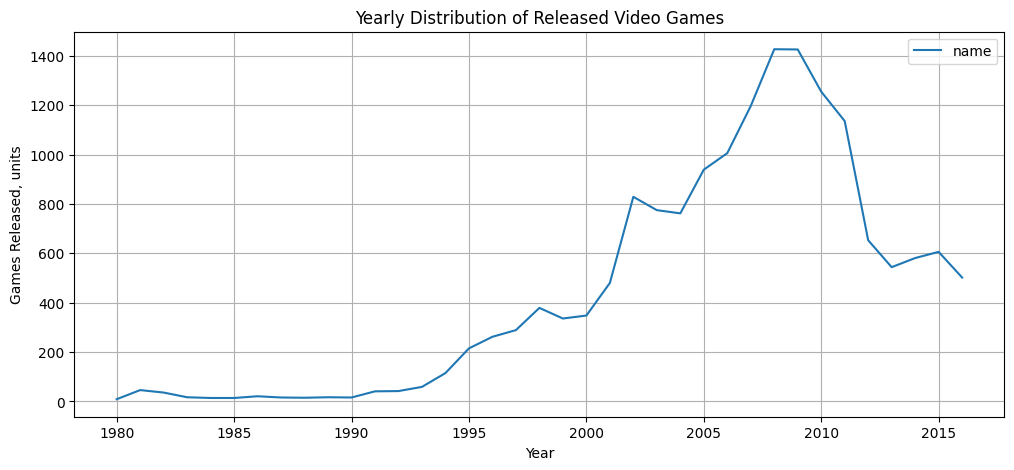

In [36]:
plot_total_games = data.pivot_table(index = ['year_of_release'],values = 'name', aggfunc = 'count').plot(grid=True, figsize=(12, 5))
plot_total_games.set_title('Yearly Distribution of Released Video Games')
plot_total_games.set_ylabel('Games Released, units')
plot_total_games.set_xlabel('Year')
plt.show()

<div style="border:solid blue 2px; padding: 20px"> 
Based on the chart, starting from around 1990, the video game industry began to grow rapidly, peaking around 2008.

In [37]:
plot_total = data.pivot_table(index = ['year_of_release','platform'],values = 'name', aggfunc = 'count')

In [38]:
platform_total = plot_total.reset_index()
platform_total = platform_total.rename(columns = {'year_of_release':'year','platform':'platform','name':'total_games_year'})    
display(platform_total)

,year,platform,total_games_year
0,1980,2600,9
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1983,NES,6
...,...,...,...
223,2016,PSV,85
224,2016,Wii,1
225,2016,WiiU,14
226,2016,X360,13


<div style="border:solid blue 2px; padding: 20px"> 
    
The table above shows how game sales were distributed across platforms over the years. However, the table is quite large, so it's helpful to visualize the data using the chart below.

<Axes: xlabel='year', ylabel='platform'>

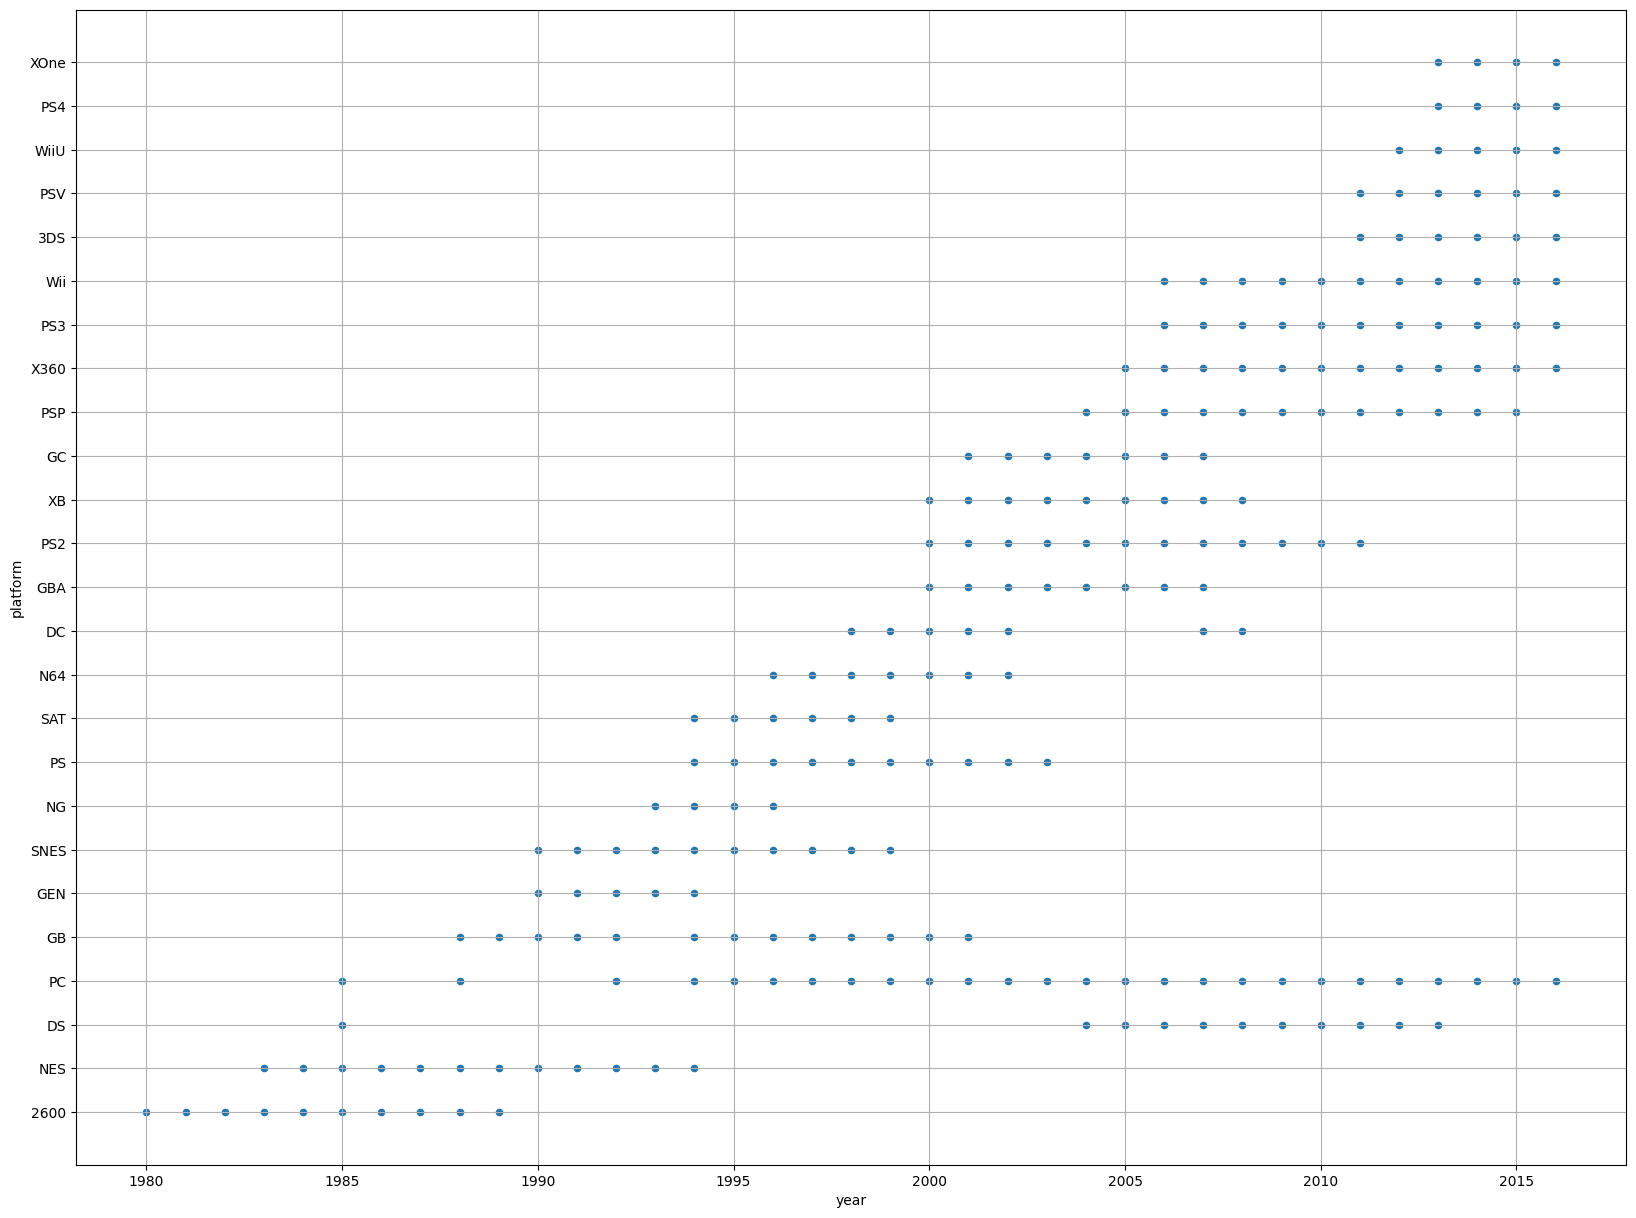

In [39]:
platform_total.plot(x='year', y='platform', kind = 'scatter',grid=True,figsize=(20, 15))



<div style="border:solid blue 2px; padding: 20px"> 
The chart illustrates when different gaming platforms appeared, were active, and left the market. Based on the visual pattern, the average platform lifecycle is about 6–8 years. The PC platform is an exception, with games released since 1985. Special attention should be paid to the right side of the chart, showing platforms still active as of 2016 — i.e., those that have released games since at least 2010. As seen earlier, the number of released games increased steadily until 2006, then declined after 2008, possibly due to some platforms exiting the market.

<div style="border:solid blue 2px; padding: 20px"> 
Let's look at the total annual sales for each platform in the following chart.



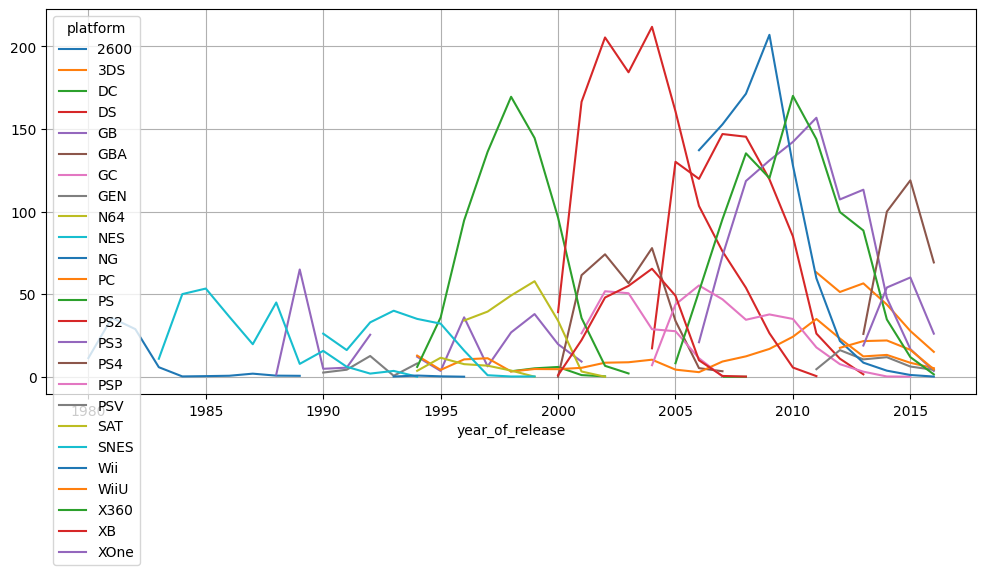

In [40]:
data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sale', aggfunc = 'sum').plot(grid=True, figsize=(12, 5))
plt.show()

<div style="border:solid blue 2px; padding: 20px"> 
This chart also shows the lifecycle of gaming platforms. For further analysis, I will focus on data from 2013 onwards. This way, newly emerging platforms will be included, while older platforms in decline won't skew the analysis with their past performance. I'll calculate total sales by year for each platform and identify the top 5–6 leaders.

In [41]:
# Switching to the period starting from 2013
data.query('year_of_release > 2013').groupby('platform')['total_sale'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sale, dtype: float64

<div style="border:solid blue 2px; padding: 20px"> 
    
The top-performing platforms over the last 3 years have been identified. I will now create a separate dataset containing only those platforms and name it **actual_data**.

In [42]:
actual_data = data.query('year_of_release > 2013 and platform == ["X360","PS3","XOne","3DS","PS4","WiiU"]')

In [43]:
actual_data.reset_index(drop=True).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,0.0,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,0.0,no_rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,0.0,no_rating,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,0.0,no_rating,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,0.0,no_rating,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


<div style="border:solid blue 2px; padding: 20px"> 
We can now visualize sales trends for these platforms from 2013 onward.

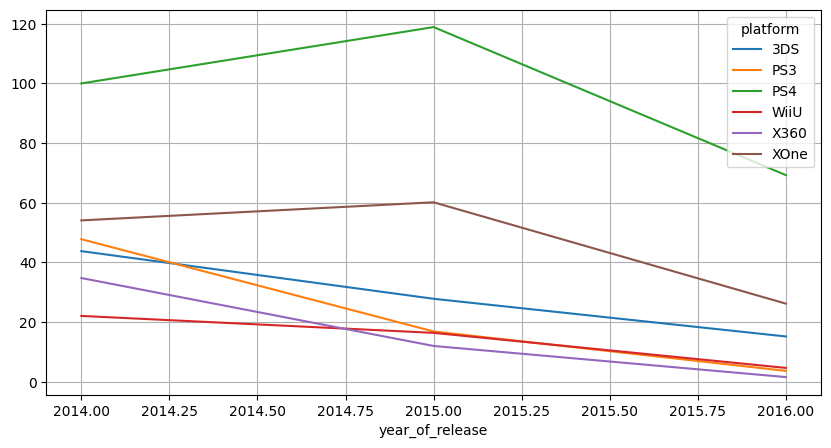

In [44]:
actual_data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sale', aggfunc = 'sum').plot(grid=True, figsize=(10, 5))
plt.show()

<div style="border:solid blue 2px; padding: 20px"> 
    
This chart shows how the sales of the six selected platforms changed from 2014 to 2016. PS4 displays the widest variation, which aligns with its leadership in the market.

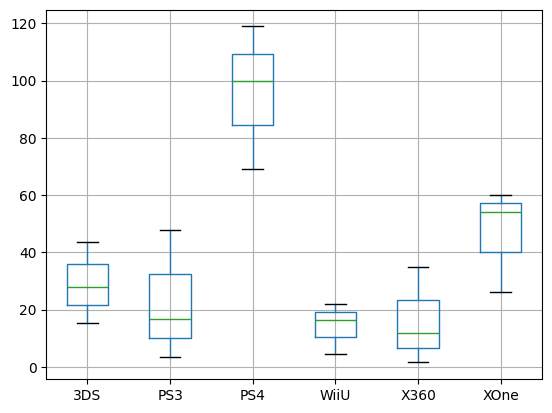

In [45]:
actual_data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sale', aggfunc = 'sum').boxplot()
plt.show()

<div style="border:solid blue 2px; padding: 20px"> 
The boxplot chart reveals the variability in sales across platforms. WiiU had the most stable data but also the lowest sales. Let's take a look at the numeric summary.

In [46]:
actual_data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sale', aggfunc = 'sum').describe()


platform,3DS,PS3,PS4,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,22.726667,96.050000,14.326667,16.073333,46.786667
std,14.342445,22.664795,25.059579,8.889411,16.987694,18.127748
min,15.140000,3.600000,69.250000,4.600000,1.520000,26.150000
25%,21.460000,10.210000,84.625000,10.475000,6.740000,40.110000
50%,27.780000,16.820000,100.000000,16.350000,11.960000,54.070000
75%,35.770000,32.290000,109.450000,19.190000,23.350000,57.105000
max,43.760000,47.760000,118.900000,22.030000,34.740000,60.140000


<div style="border:solid blue 2px; padding: 20px"> 
    
Comparing **median** sales values shows the following ranking::

1. PS4
2. XONE
3. 3DS
4. PS3
5. WiiU
6. X360

PS4 and XOne both launched in the same year and led the market during the analysis period. PS4 also had the largest standard deviation, as reflected in both variability charts. XOne ranked second in sales, though its median was nearly half that of PS4. The remaining platforms had similar performance levels.

#### Exploring the correlation between reviews and sales success.

536


,critic_score,user_score,total_sale
critic_score,1.000000,0.566157,0.383547
user_score,0.566157,1.000000,0.018919
total_sale,0.383547,0.018919,1.000000


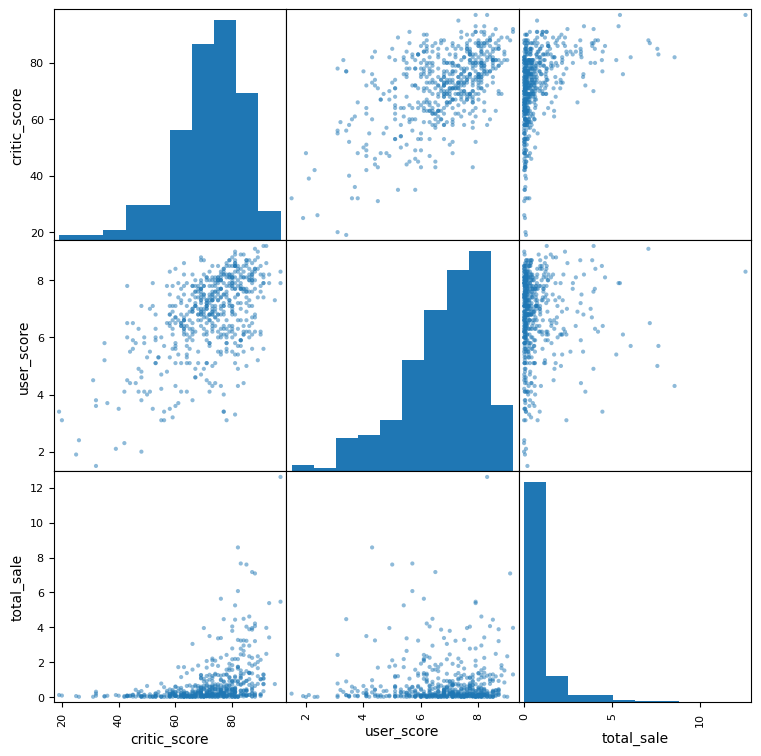

In [47]:
actual_data_matrix = actual_data.query('critic_score > 0 and user_score > 0')
print(len(actual_data_matrix))
display(actual_data_matrix[['critic_score', 'user_score','total_sale']].corr())
pd.plotting.scatter_matrix(actual_data_matrix[['critic_score', 'user_score','total_sale']], figsize=(9, 9))
plt.show()


<div style="border:solid blue 2px; padding: 20px"> 
After calculating the correlation coefficients for the six leading platforms from 2013 to 2016, we can conclude that there is virtually no correlation between user ratings and game sales. However, there is a moderate positive correlation between critic ratings and sales (0.38).
This coefficient can also be examined for individual platforms, for example, for PS3.

,critic_score,user_score,total_sale
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,0.156595
total_sale,0.446575,0.156595,1.000000


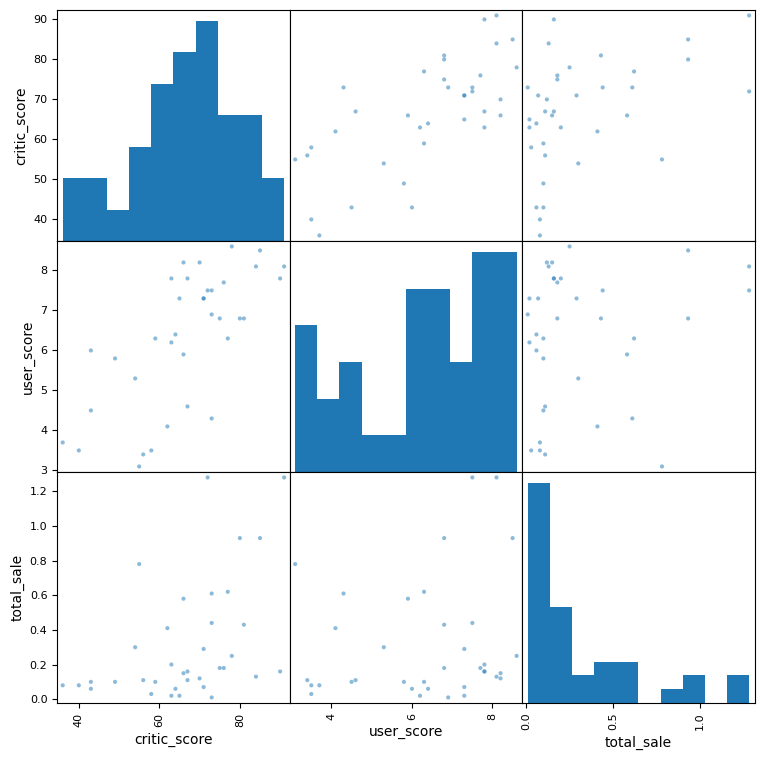

In [48]:
display(actual_data_matrix.query('platform == "PS3"')[['critic_score', 'user_score','total_sale']].corr())
pd.plotting.scatter_matrix(actual_data_matrix.query('platform == "PS3"')[['critic_score', 'user_score','total_sale']], figsize=(9, 9))
plt.show()


### Conclusion:
For the PS3 platform, the correlation between critic reviews and sales is 0.44, while the correlation between user reviews and sales is 0.15.
**This suggests that critic ratings may have some influence on sales performance, whereas user ratings appear to have little or no impact.**

### Analysis of Game Distribution by Genre

In [49]:
actual_data.groupby(['genre'])['total_sale'].sum().sort_values()

genre
Strategy          1.49
Puzzle            2.15
Simulation        6.49
Adventure        14.64
Platform         17.84
Racing           26.78
Fighting         27.43
Misc             30.91
Role-Playing     90.47
Sports          106.70
Shooter         164.51
Action          185.16
Name: total_sale, dtype: float64

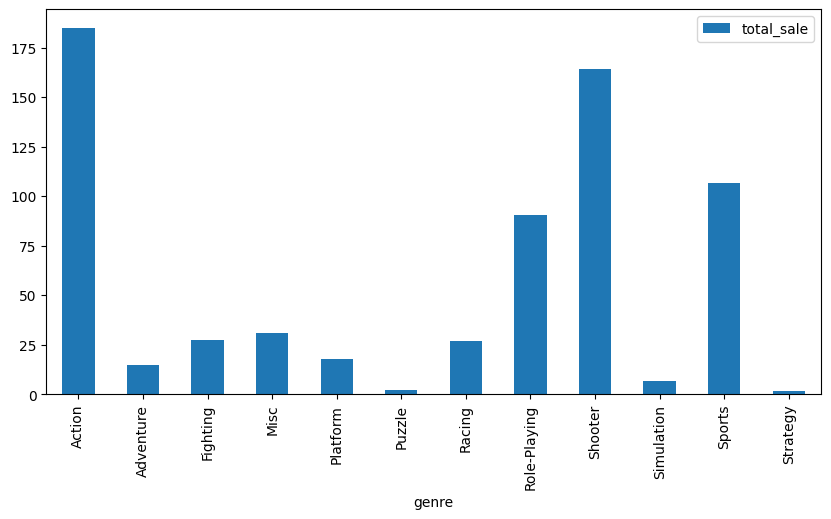

In [50]:
actual_data.groupby(['genre'])['total_sale'].sum().plot(kind= 'bar',figsize=(10,5),legend =True)
plt.show()

In [51]:
actual_data.pivot_table(index = 'year_of_release' ,columns = 'genre', values = 'total_sale', aggfunc = 'sum')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,90.88,4.23,15.28,18.67,8.66,1.44,16.30,40.27,62.07,0.74,43.25,0.57
2015,66.59,7.33,7.85,10.03,6.01,0.71,7.81,33.66,66.13,4.83,40.40,0.60
2016,27.69,3.08,4.30,2.21,3.17,NaN,2.67,16.54,36.31,0.92,23.05,0.32


In [52]:
actual_data.pivot_table(index = 'year_of_release' ,columns = 'genre', values = 'total_sale', aggfunc = 'sum').describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,61.720000,4.880000,9.143333,10.303333,5.946667,1.075000,8.926667,30.156667,54.836667,2.163333,35.566667,0.496667
std,31.875252,2.198295,5.603091,8.233404,2.745548,0.516188,6.883272,12.246764,16.172475,2.311154,10.933016,0.153731
min,27.690000,3.080000,4.300000,2.210000,3.170000,0.710000,2.670000,16.540000,36.310000,0.740000,23.050000,0.320000
25%,47.140000,3.655000,6.075000,6.120000,4.590000,0.892500,5.240000,25.100000,49.190000,0.830000,31.725000,0.445000
50%,66.590000,4.230000,7.850000,10.030000,6.010000,1.075000,7.810000,33.660000,62.070000,0.920000,40.400000,0.570000
75%,78.735000,5.780000,11.565000,14.350000,7.335000,1.257500,12.055000,36.965000,64.100000,2.875000,41.825000,0.585000
max,90.880000,7.330000,15.280000,18.670000,8.660000,1.440000,16.300000,40.270000,66.130000,4.830000,43.250000,0.600000


<div style="border:solid blue 2px; padding: 20px"> 

The table above shows the distribution of game sales by genre over the analyzed period. Median and mean values are quite similar, and the top three genres in terms of sales appear to be consistently dominant.

Top genres by median sales:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Top genres by mean sales:

1. Action
2. Shooter
3. Sports
4. Misc
5. Fighting

<div style="border:solid blue 2px; padding: 20px"> 
The most popular game genres are as follows:

1. Action
2. Shooter
3. Sports

As for the least popular genres, these are Strategy and Puzzle.
It is not possible to assess the profitability of these genres based on the chart alone, as we do not have data on company profits. However, we can conclude that games in the top genres are sold more frequently than those in other categories.

## Regional User Profile Analysis

 ### North American sales can be examined through data aggregation and graphical analysis.

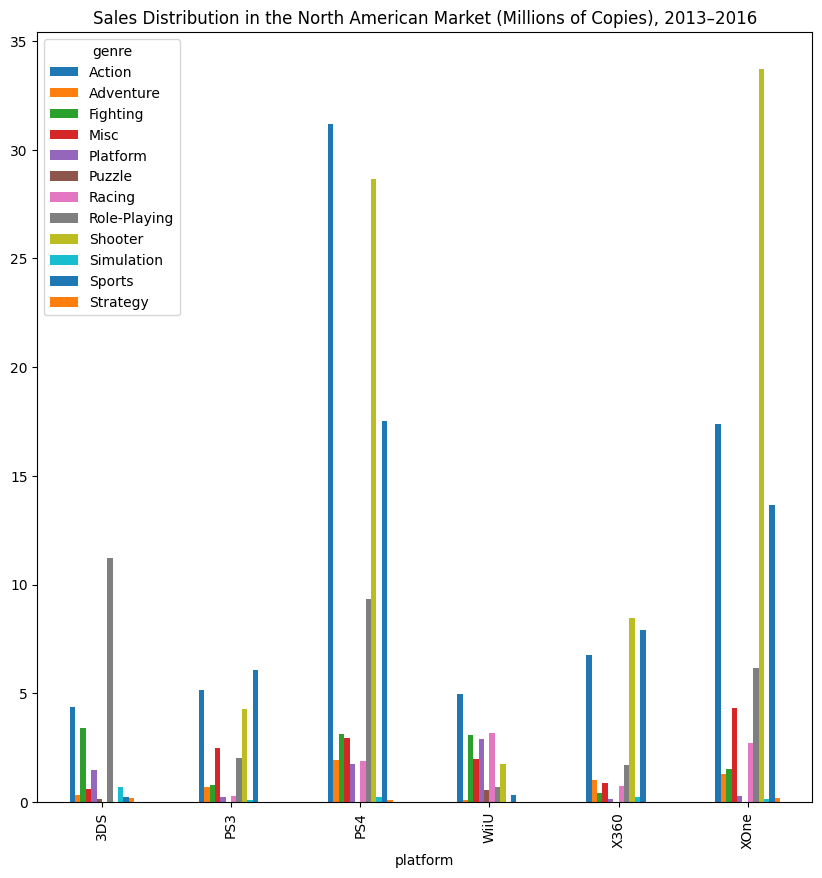

In [53]:
ax =actual_data.pivot_table(index = "platform",columns = "genre",values = "na_sales", aggfunc = "sum").plot(kind = 'bar',figsize = (10,10))
ax = ax.set_title('Sales Distribution in the North American Market (Millions of Copies), 2013–2016')




<div style="border:solid blue 2px; padding: 20px"> 
We will now examine the same data in table format, aggregated by genre across all platforms.

In [54]:
actual_data.pivot_table(index = 'genre', values = 'na_sales',aggfunc= 'sum').sort_values(by= 'na_sales', ascending=False)

,na_sales
genre,
Shooter,76.83
Action,69.83
Sports,45.71
Role-Playing,31.14
Misc,13.15
Fighting,12.33
Racing,8.74
Platform,6.76
Adventure,5.28


<div style="border:solid blue 2px; padding: 20px"> 
Now, I will determine the share of total sales accounted for by each genre.

In [55]:
country_sale = actual_data.pivot_table(index = "platform",values = "na_sales", aggfunc = "sum")


In [56]:
def share (row):
    sale = row['na_sales']
    total = country_sale['na_sales'].sum()
    return sale/total * 100
country_sale['share_sale'] = country_sale.apply(share, axis = 1)

In [57]:
display(country_sale.sort_values(by = 'share_sale',ascending=False))

,na_sales,share_sale
platform,,
PS4,98.61,36.223047
XOne,81.27,29.853433
X360,28.30,10.395621
3DS,22.64,8.316497
PS3,22.05,8.099769
WiiU,19.36,7.111634


<div style="border:solid blue 2px; padding: 20px"> 
Next, I will identify which ESRB rating categories are most common among best-selling games in North America.

,na_sales
rating,
M,91.25
no_rating,63.85
E,50.28
T,36.05
E10+,30.80


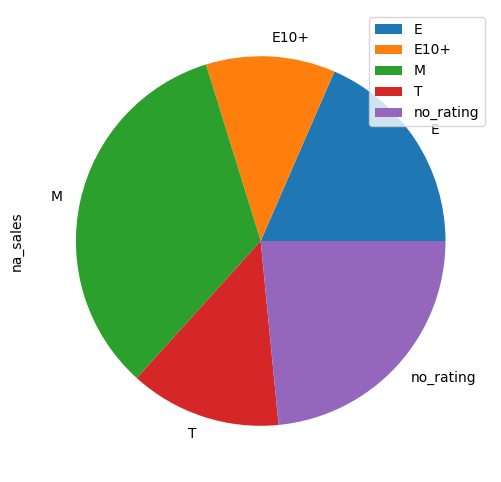

In [58]:
actual_data.pivot_table(index= 'rating', values = 'na_sales', aggfunc = 'sum').plot (y= 'na_sales',kind = 'pie', subplots=True, figsize = (6,6))
display(actual_data.pivot_table(index= 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by= 'na_sales', ascending=False) )    

<div style="border:solid blue 2px; padding: 20px">
**Conclusion:**

In terms of the number of copies sold in North America, the leading platform is PS4 with 36.22% 
of total sales.

1. XOne – 29.85%
2. X360 – 10.39%
3. 3DS – 8.31%
4. PS3 – 8.09%

The most popular genre is Shooter, followed by:
Action, Sports, Role-Playing, and Misc.

Regarding ESRB ratings, the top 5 categories by sales are:

1. M (Mature)
2. no_rating
3. E (Everyone)
4. T (Teen)
5. E10+ (Everyone 10 and older)

## Sales in Europe

<div style="border:solid blue 2px; padding: 20px"> 
    
Sales in Europe and Japan are analyzed using the same approach.

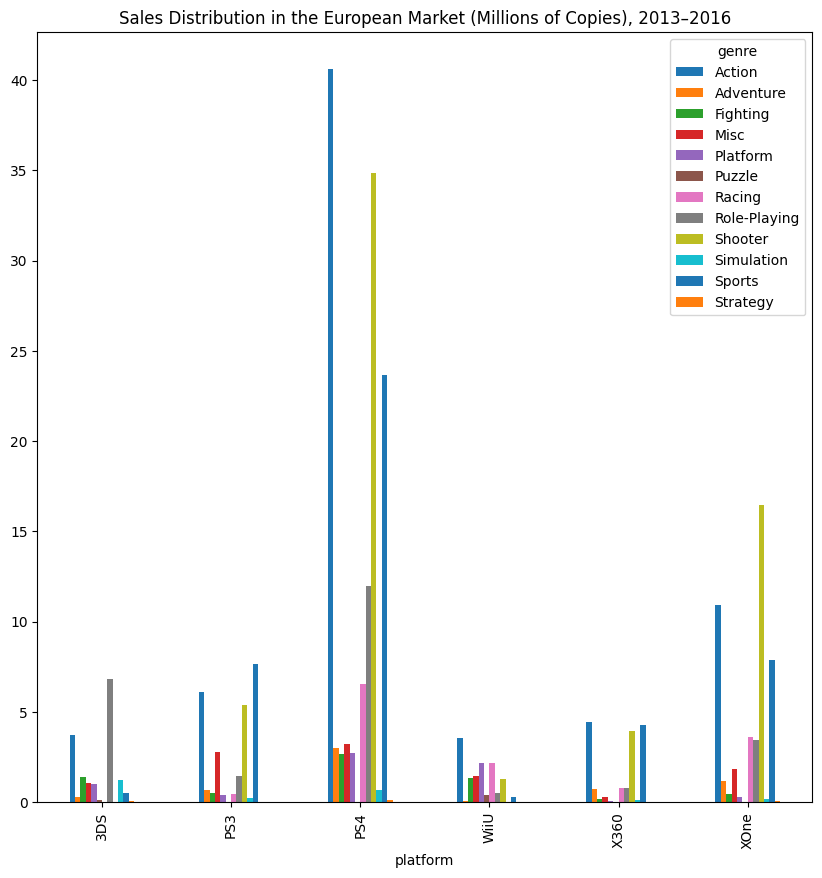

In [59]:
ax =actual_data.pivot_table(index = "platform",columns = "genre",values = "eu_sales", aggfunc = "sum").plot(kind = 'bar',figsize = (10,10))
ax = ax.set_title('Sales Distribution in the European Market (Millions of Copies), 2013–2016')


In [60]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales',aggfunc= 'sum').sort_values(by= 'eu_sales', ascending=False)

,eu_sales
genre,
Action,69.32
Shooter,61.87
Sports,44.17
Role-Playing,24.91
Racing,13.51
Misc,10.61
Platform,6.65
Fighting,6.51
Adventure,5.92


In [61]:
country_sale = actual_data.pivot_table(index = "platform",values = "eu_sales", aggfunc = "sum")

def share (row):
    sale = row['eu_sales']
    total = country_sale['eu_sales'].sum()
    return sale/total * 100
country_sale['share_sale'] = country_sale.apply(share, axis = 1)

display(country_sale.sort_values(by = 'share_sale',ascending=False))

,eu_sales,share_sale
platform,,
PS4,130.04,52.735310
XOne,46.25,18.755830
PS3,25.54,10.357273
3DS,16.12,6.537167
X360,15.49,6.281682
WiiU,13.15,5.332739


,eu_sales
rating,
M,85.40
E,55.05
no_rating,54.71
T,29.21
E10+,22.22


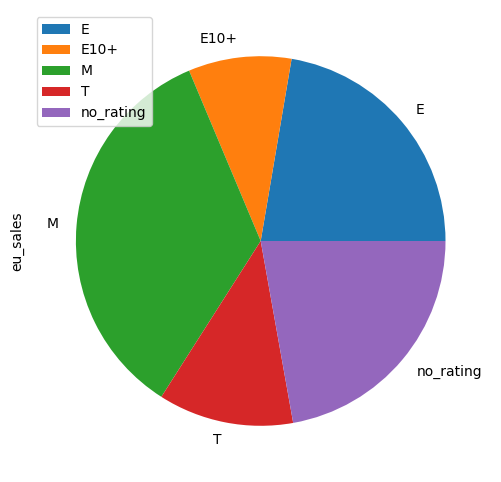

In [62]:
actual_data.pivot_table(index= 'rating', values = 'eu_sales', aggfunc = 'sum').plot (y= 'eu_sales',kind = 'pie', subplots=True, figsize = (6,6))
display(actual_data.pivot_table(index= 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by= 'eu_sales', ascending=False))                                                                                 


<div style="border:solid blue 2px; padding: 20px"> 
**Conclusion:**

In Europe, the platform with the highest number of copies sold is **PS4**, accounting for 52.7% of total sales.

2. XOne – 18.75%
3. PS3 – 10.35%
4. 3DS – 6.53%
5. X360 – 6.28%

The most popular genre is **Action**, followed by:
**Shooter, Sports, Role-Playing,** and **Racing**.

Regarding ESRB ratings, the top 5 categories by sales are:

1. M (Mature)
2. E (Everyone)
3. no rating
4. T (Teen)
5. E10+ (Everyone 10 and older)



Sales in Japan

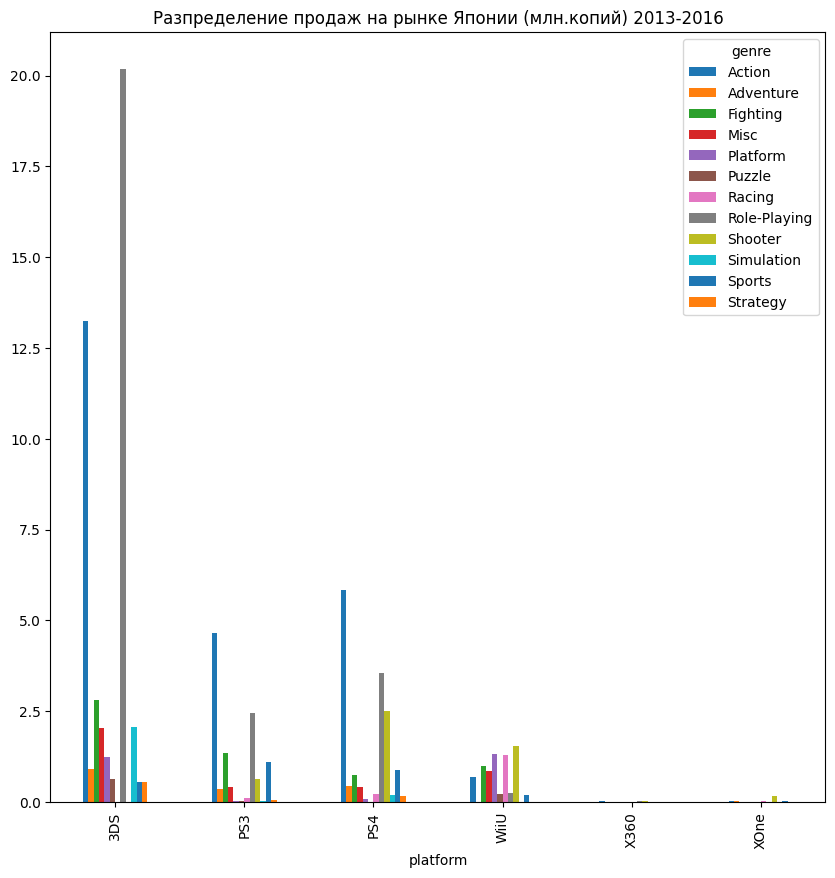

In [63]:
ax =actual_data.pivot_table(index = "platform",columns = "genre",values = "jp_sales", aggfunc = "sum").plot(kind = 'bar',figsize = (10,10))
ax = ax.set_title('Разпределение продаж на рынке Японии (млн.копий) 2013-2016')


In [64]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales',aggfunc= 'sum').sort_values(by= 'jp_sales', ascending=False)

,jp_sales
genre,
Role-Playing,26.47
Action,24.48
Fighting,5.91
Shooter,4.86
Misc,3.74
Sports,2.72
Platform,2.65
Simulation,2.27
Adventure,1.77


,jp_sales,share_sale
platform,,
3DS,44.24,56.580125
PS4,15.02,19.209618
PS3,11.22,14.349661
WiiU,7.31,9.349022
XOne,0.32,0.409259
X360,0.08,0.102315


,jp_sales
rating,
no_rating,47.18
T,10.73
E,8.89
M,7.21
E10+,4.18


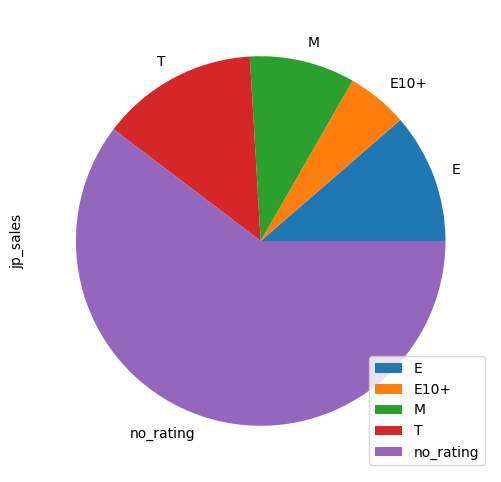

In [65]:
country_sale = actual_data.pivot_table(index = "platform",values = "jp_sales", aggfunc = "sum")

def share (row):
    sale = row['jp_sales']
    total = country_sale['jp_sales'].sum()
    return sale/total * 100
country_sale['share_sale'] = country_sale.apply(share, axis = 1)

display(country_sale.sort_values(by = 'share_sale',ascending=False))

actual_data.pivot_table(index= 'rating', values = 'jp_sales', aggfunc = 'sum').plot (y= 'jp_sales',kind = 'pie', subplots=True, figsize = (6,6))
display(actual_data.pivot_table(index= 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by= 'jp_sales', ascending=False)  ) 

<div style="border:solid blue 2px; padding: 20px"> 
**Conclusion:**

In Japan, the platform with the highest number of copies sold is **3DS**, accounting for 56.58% of all sales.

2. PS4 – 19.20%
3. PS3 – 14.34%
4. WiiU – 9.34%
5. XOne – 0.4%

The most popular genre is **Role-Playing**, followed by:
**Action, Fighting, Shooter,** and **Misc**.

Regarding ESRB ratings, the top 5 categories by sales are:

1. no\_rating
2. T (Teen)
3. E (Everyone)
4. M (Mature)
5. E10+ (Everyone 10 and older)


## Hypothesis Testing

#### Hypothesis Test: Are the Mean User Ratings for Xbox One and PC the Same?

<div style="border:solid blue 2px; padding: 20px"> 
To test the first assumption, we formulate the null and alternative hypotheses: <br>


H₀ (Null Hypothesis): The mean user ratings for Xbox One and PC are equal.

H₁ (Alternative Hypothesis): The mean user ratings for Xbox One and PC are not equal.

To test this, we need to filter the relevant data and apply the ttest_ind function.


In [66]:
XOne = data.query('platform == "XOne" and user_score > 0 and year_of_release>=2013')['user_score']
PC = data.query('platform == "PC" and user_score > 0 and year_of_release>=2013')['user_score']
alpha = 0.05


results = st.ttest_ind(XOne,PC)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("The null hypothesis has been rejected.")
else:
    print("The null hypothesis could not be rejected.")

    
    

p-value: 0.14012658403611647
The null hypothesis could not be rejected.


In [67]:
display(XOne.describe())

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [68]:

display(PC.describe())

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
Conclusion:

Based on the results of the statistical test, we can conclude that the mean user ratings for Xbox One and PC are likely to be the same. Given that the data comes from a relatively small sample, we can also compare the two groups using descriptive statistics — both the mean and median values are very similar in each case.

#### Hypothesis Test: Are the Mean User Ratings for the Action and Sports Genres Different?

<div style="border:solid blue 2px; padding: 20px">

To test this assumption, we formulate the null and alternative hypotheses. Since the null hypothesis is expressed as an equality, we rephrase the statement as follows:

H₀ (Null Hypothesis): The mean user rating for the Action genre is equal to the mean user rating for the Sports genre.

H₁ (Alternative Hypothesis): The mean user rating for the Action genre is not equal to the mean user rating for the Sports genre.

<div style="border:solid blue 2px; padding: 20px"> 
I will filter the samples and use the `describe()` method for a preliminary comparison.
If the standard deviations differ noticeably, I will set the `equal_var=False` parameter when performing the hypothesis test.


In [69]:
action = actual_data.query('genre == "Action"')['user_score']
sport = actual_data.query('genre == "Sports"')['user_score']

In [70]:
display(action.describe())

count    457.000000
mean       3.534354
std        3.501081
min        0.000000
25%        0.000000
50%        3.700000
75%        7.100000
max        9.000000
Name: user_score, dtype: float64

In [71]:
display(sport.describe())

count    138.000000
mean       4.256522
std        2.649968
min        0.000000
25%        2.475000
50%        5.050000
75%        6.300000
max        8.700000
Name: user_score, dtype: float64

In [72]:
alpha = 0.05
results = st.ttest_ind(sport,action,equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("The null hypothesis has been rejected.")
else:
    print("The null hypothesis could not be rejected.")

p-value: 0.010056449779356847
The null hypothesis has been rejected.


<div style="border:solid blue 2px; padding: 20px">
Conclusion:
The p-value is 0.01, which is less than the significance level of 0.05.
Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference between the mean user ratings for the Action and Sports genres.

## Final Conclusion

<div style="border:solid blue 2px; padding: 20px">

## Overall Conclusion


After analyzing the data from the given time period, I concluded that a 2–3 year window is most relevant for market analysis in the video game industry. By comparing the total number of copies sold across all platforms since 2013, I identified the six leading platforms with the following total sales (in millions):

* PS4: 288.15
* XOne: 140.36
* 3DS: 86.68
* PS3: 68.18
* X360: 48.22
* WiiU: 42.98

The ranking based on median sales values was nearly identical:

1. PS4
2. XOne
3. 3DS
4. PS3
5. WiiU
6. X360

This suggests that PS4 can be considered the undisputed market leader during the analyzed period.

Next, I examined whether user and critic ratings influence sales performance. The results showed a weak correlation between critic scores and sales, and virtually no correlation between user scores and sales.

An analysis of the regional markets (North America, Europe, and Japan) revealed the following insights:

**North American and European markets** are fairly similar in their preferences:

* Sales are distributed across a wide variety of platforms.
* The top three platforms are almost identical.
* Preferences for genres and ESRB ratings are similar, with “Mature” rated games being the most popular.

For reference, ESRB rating categories include:

* **M (Mature)** – For ages 17 and up. May contain intense violence, blood and gore, sexual content, or strong language.
* **E (Everyone)** – Suitable for ages 6 and older. May contain minimal cartoon, fantasy, or mild violence.
* **T (Teen)** – Suitable for ages 13 and older. May include violence, suggestive themes, crude humor, minimal blood, or infrequent use of strong language.

In contrast, the **Japanese market** stands out as more unique:

* The 3DS platform dominates sales, accounting for around 57% of the market.
* Some platforms that are popular in North America and Europe have very low sales in Japan (under 2%).
* Genre preferences also differ — Role-Playing games are significantly more popular in Japan.
* A large portion of games sold in Japan have no ESRB rating.

These observations suggest that game publishers should carefully consider regional differences when planning releases. The contrast in player preferences between Japan and Western markets clearly demonstrates the importance of localization and market-specific strategies. Additionally, high critic ratings may have a positive impact on sales and should not be overlooked.


